In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import Ridge

In [55]:
df=pd.read_csv('/content/Housing.csv')


In [56]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [57]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [58]:
#duplicate values
duplicates= df.duplicated().sum()
duplicates
#no duplicates row

0

In [59]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [60]:
px.scatter(df,x = 'area', y='bedrooms')


In [61]:
#categorical to integers
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()


In [63]:
df['area']=le.fit_transform(df['area'])
df['bedrooms']=le.fit_transform(df['bedrooms'])
df['bathrooms']=le.fit_transform(df['bathrooms'])
df['mainroad']=le.fit_transform(df['mainroad'])
df['basement']=le.fit_transform(df['basement'])
df['parking']=le.fit_transform(df['parking'])

In [64]:
x = df[['area','bedrooms','bathrooms','mainroad','basement','parking']]
y = df[['price']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
features = df[['area','bedrooms','bathrooms','mainroad','basement','parking']]
target = df[['price']]

In [66]:
# Create a new DataFrame with only the selected columns
data_new= pd.concat([features, target], axis=1)
corr_matrix = data_new.corr()

In [67]:
corr_matrix

,area,bedrooms,bathrooms,mainroad,basement,parking,price
area,1.000000,0.163235,0.211224,0.329097,0.060676,0.360925,0.575107
bedrooms,0.163235,1.000000,0.373930,-0.012033,0.097312,0.139270,0.366494
bathrooms,0.211224,0.373930,1.000000,0.042398,0.102106,0.177496,0.517545
mainroad,0.329097,-0.012033,0.042398,1.000000,0.044002,0.204433,0.296898
basement,0.060676,0.097312,0.102106,0.044002,1.000000,0.051497,0.187057
parking,0.360925,0.139270,0.177496,0.204433,0.051497,1.000000,0.384394
price,0.575107,0.366494,0.517545,0.296898,0.187057,0.384394,1.000000


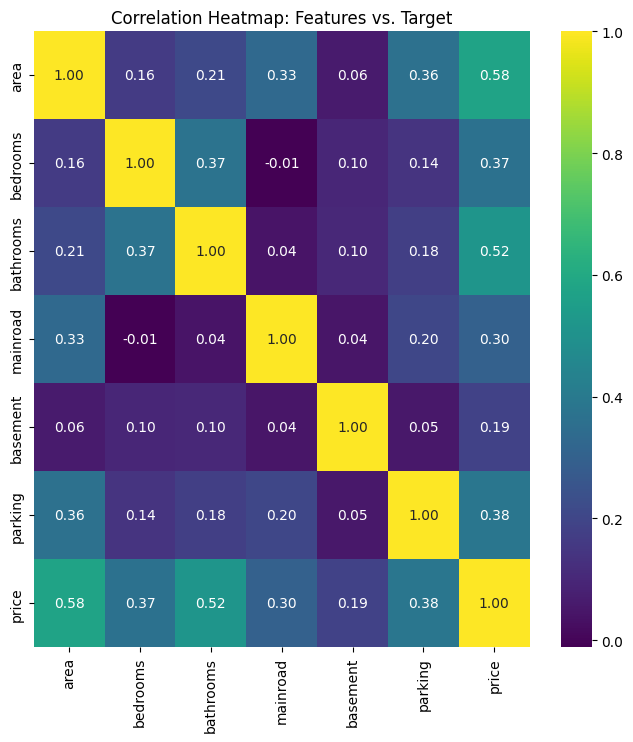

In [68]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap: Features vs. Target")
plt.show()

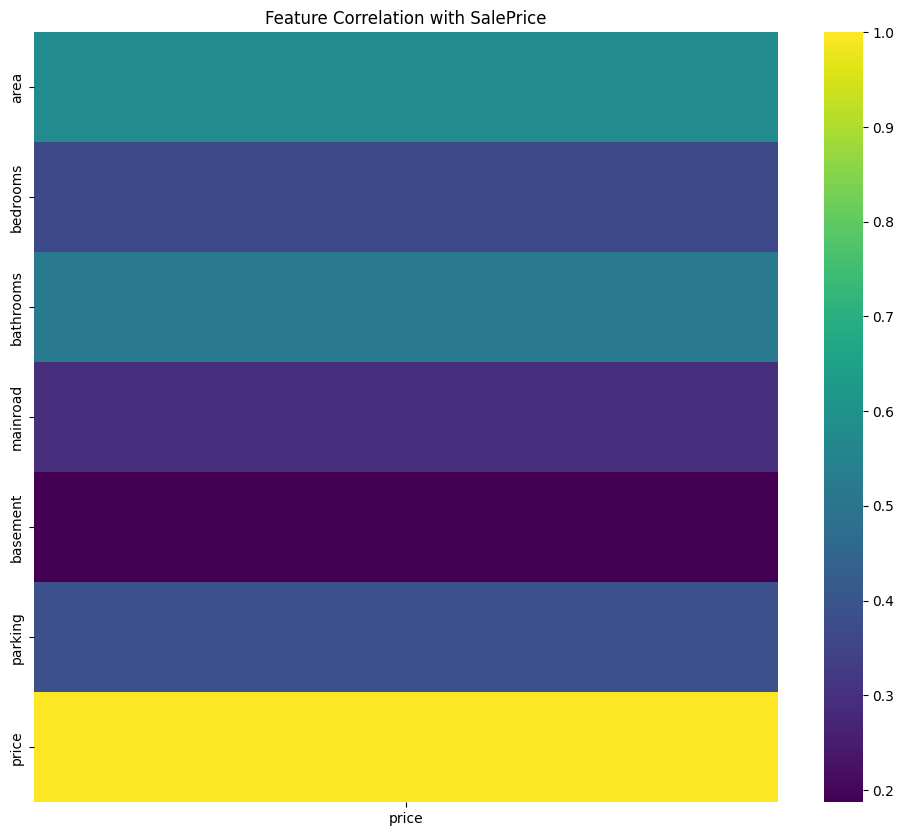

In [69]:
#heatmaps
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['price']], cmap='viridis')
plt.title("Feature Correlation with SalePrice")
plt.show()

In [70]:
#create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(x_train, y_train)

LinearRegression()

In [71]:
# Make predictions on the test data
y_pred = model.predict(x_test)

In [72]:
model.score(x_train,y_train)


0.5763925019994292

In [49]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [73]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2498570953172.19
R-squared: 0.51


In [74]:
model.predict([[7420,4,2,0,1,0]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[72871543.50583132]])

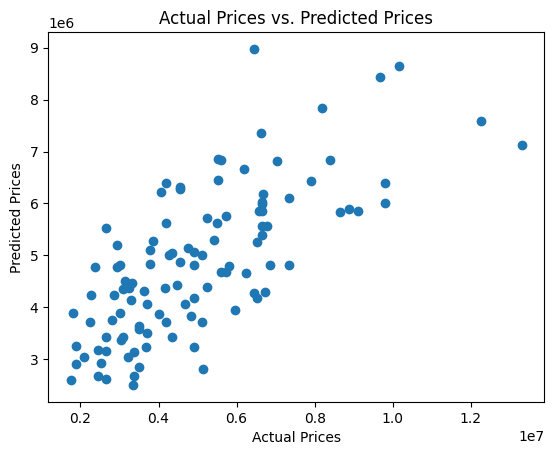

In [75]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()